# *PyCaret*

In [1]:
# "Montando" o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importações iniciais
import pandas as pd 

In [3]:
# Instalando
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# configuração inicial
from pycaret.classification import *

In [5]:
# Carregando os dados!
dados_caret = pd.read_csv('/content/drive/MyDrive/Dados/heart_failure_clinical_records_dataset.csv')
s = setup(dados_caret, target = 'DEATH_EVENT')

,Description,Value
0,Session id,2392
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Os 5 modelos ordenados pelo 'F1-score'
melhor = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8471,0.9005,0.7214,0.8000,0.7465,0.6396,0.6507,0.1080
rf,Random Forest Classifier,0.8424,0.8993,0.7214,0.7830,0.7327,0.6257,0.6391,0.3500
dt,Decision Tree Classifier,0.8136,0.8064,0.7810,0.7032,0.7306,0.5920,0.6020,0.0670
gbc,Gradient Boosting Classifier,0.8376,0.8852,0.7214,0.7568,0.7268,0.6151,0.6237,0.1790
ridge,Ridge Classifier,0.8331,0.0000,0.6810,0.7754,0.7116,0.5992,0.6103,0.0630
lda,Linear Discriminant Analysis,0.8283,0.8809,0.6810,0.7620,0.7065,0.5898,0.5997,0.0560
ada,Ada Boost Classifier,0.7993,0.8442,0.6738,0.6951,0.6795,0.5343,0.5384,0.1800
lr,Logistic Regression,0.8095,0.8457,0.6214,0.7602,0.6663,0.5394,0.5554,0.6820
et,Extra Trees Classifier,0.8183,0.8928,0.5833,0.7774,0.6583,0.5440,0.5563,0.2980
nb,Naive Bayes,0.7905,0.8588,0.4905,0.7258,0.5561,0.4511,0.4727,0.0530


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [7]:
# Vizualizando observando a performance do modelo
evaluate_model(melhor)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

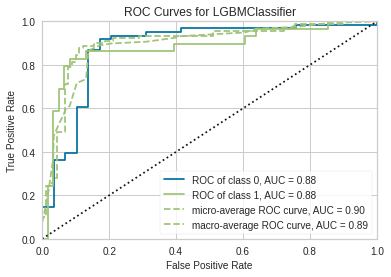

In [8]:
# Vizualizando observando a performance do modelo
plot_model(melhor, plot = 'auc')

In [9]:
predict_model(melhor)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8778,0.8796,0.8276,0.8000,0.8136,0.7227,0.7229


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction_label,prediction_score
209,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0,1,0.8352
210,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112,0,0,0.7891
211,60.0,1,2281,1,40,0,283000.0,1.0,141,0,0,187,0,0,0.9989
212,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74,0,0,0.9873
213,85.0,0,5882,0,35,0,243000.0,1.0,132,1,1,72,1,1,0.6456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,50.0,0,482,1,30,0,329000.0,0.9,132,0,0,109,0,0,0.9591
295,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87,0,1,0.5541
296,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,0,0.9982
297,70.0,0,1202,0,50,1,358000.0,0.9,141,0,0,196,0,0,0.9952


In [10]:
# Fazendo as predições
pred = predict_model(melhor, data=dados_caret)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9632,0.9680,0.9479,0.9381,0.9430,0.9158,0.9159


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction_label,prediction_score
0,75.0,0,582,0,20,1,265000.00000,1.9,130,1,0,4,1,1,0.9967
1,55.0,0,7861,0,38,0,263358.03125,1.1,136,1,0,6,1,1,0.9870
2,65.0,0,146,0,20,0,162000.00000,1.3,129,1,1,7,1,1,0.9974
3,50.0,1,111,0,20,0,210000.00000,1.9,137,1,0,7,1,1,0.9146
4,65.0,1,160,1,20,0,327000.00000,2.7,116,0,0,8,1,1,0.9849


In [13]:
# Salvando o modelo
save_model(melhor, 'Melhor modelo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'anaemia',
                                              'creatinine_phosphokinase',
                                              'diabetes', 'ejection_fraction',
                                              'high_blood_pressure', 'platelets',
                                              'serum_creatinine', 'serum_sodium',
                                              'sex', 'smoking', 'time'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                